## Model 2

Since I'm using the google colab (runtime would be refresh everytime I close my computer), the performance of my first model on the test dataset is poor, I try to implement another model in the second file for better performance. The first part is copy paste from my part 1 file

In [1]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import imshow, imread
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from PIL import Image
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.utils import to_categorical
from keras.applications import MobileNet, MobileNetV2, VGG16, EfficientNetB0, ResNet50, EfficientNetB3
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [2]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [3]:
datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    validation_split=0.1,
    horizontal_flip = True
)

In [4]:
h, w = 224, 224
batch_size = 32
epochs = 25
train_set = datagen.flow_from_directory(
    '/content/drive/MyDrive/archive/Training',
    target_size=(h, w),
    batch_size=batch_size,
    class_mode='categorical',
    subset = 'training'
)

Found 2585 images belonging to 4 classes.


In [5]:
validation_set = datagen.flow_from_directory(
    '/content/drive/MyDrive/archive/Training',
    target_size=(h, w),
    batch_size=batch_size,
    class_mode='categorical',
    subset = 'validation'
)

Found 285 images belonging to 4 classes.


In [6]:
test_set = datagen.flow_from_directory(
    '/content/drive/MyDrive/archive/Testing',
    target_size=(h, w),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 394 images belonging to 4 classes.


In [18]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(4, activation = "softmax"))

In [19]:
model.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['accuracy']) 

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      4864      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 dropout_4 (Dropout)         (None, 112, 112, 64)      0         
                                                                 
 flatten (Flatten)           (None, 802816)            0         
                                                                 
 dense_4 (Dense)             (None, 1024)              822084608 
                                                                 
 dropout_5 (Dropout)         (None, 1024)              0         
                                                        

In [9]:
with tf.device('/device:GPU:0'):
  history = model.fit(train_set, validation_data = validation_set, batch_size = batch_size,
                    epochs = epochs, verbose = 1)

Epoch 1/25
81/81 [==============================] - 44s 489ms/step - loss: 4.3004 - accuracy: 0.3605 - val_loss: 1.2928 - val_accuracy: 0.3895
Epoch 2/25
81/81 [==============================] - 39s 482ms/step - loss: 1.0855 - accuracy: 0.5242 - val_loss: 1.3201 - val_accuracy: 0.4281
Epoch 3/25
81/81 [==============================] - 39s 481ms/step - loss: 0.8758 - accuracy: 0.6364 - val_loss: 1.0489 - val_accuracy: 0.5754
Epoch 4/25
81/81 [==============================] - 39s 483ms/step - loss: 0.7874 - accuracy: 0.6611 - val_loss: 1.2736 - val_accuracy: 0.4772
Epoch 5/25
81/81 [==============================] - 39s 482ms/step - loss: 0.7157 - accuracy: 0.6921 - val_loss: 1.0636 - val_accuracy: 0.5579
Epoch 6/25
81/81 [==============================] - 39s 481ms/step - loss: 0.6838 - accuracy: 0.7168 - val_loss: 1.0299 - val_accuracy: 0.6386
Epoch 7/25
81/81 [==============================] - 39s 480ms/step - loss: 0.6343 - accuracy: 0.7315 - val_loss: 1.0548 - val_accuracy: 0.6105

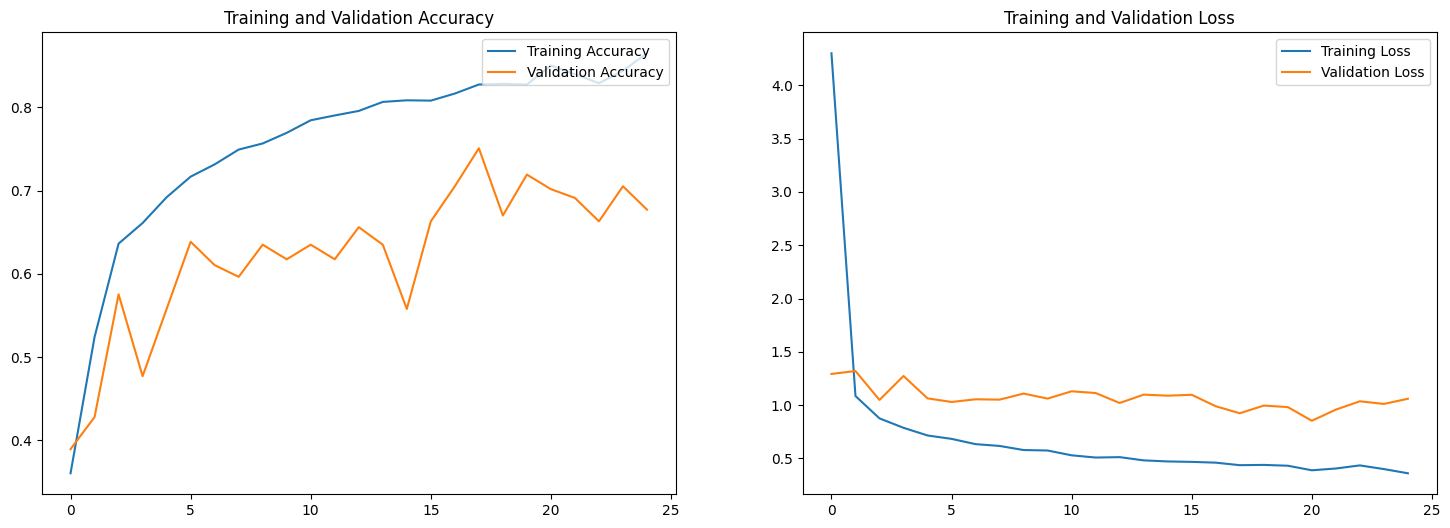

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(history.history['accuracy']))

plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.plot(range(len(history.history['accuracy'])), acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [11]:
predicted_labels_1 = model.predict(test_set)
predicted_labels_1 = [np.argmax(i) for i in predicted_labels_1]
original_labels_1 = test_set.classes

13/13 [==============================] - 5s 386ms/step


In [12]:
conf_mat_1 = confusion_matrix(original_labels_1, predicted_labels_1)
report_1 = classification_report(original_labels_1, predicted_labels_1)
print(conf_mat_1)
print(report_1)

[[ 7 46 36 11]
 [ 4 50 53  8]
 [ 3 40 49 13]
 [ 4 37 27  6]]
              precision    recall  f1-score   support

           0       0.39      0.07      0.12       100
           1       0.29      0.43      0.35       115
           2       0.30      0.47      0.36       105
           3       0.16      0.08      0.11        74

    accuracy                           0.28       394
   macro avg       0.28      0.26      0.23       394
weighted avg       0.29      0.28      0.25       394



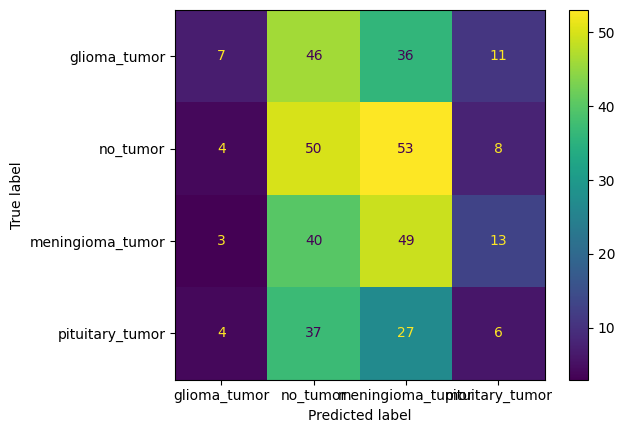

In [13]:
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']
cm = confusion_matrix(original_labels_1, predicted_labels_1)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
disp.plot()
plt.show()

My model seems to have a good performance on both train and validation dataset, however, the performance on the test dataset is low. Since we've have a validation dataset, so I argue it might not be the problem of overfitting. Other possibilities might be test set not representative enough. As a result, I combine the original test and train dataset and resample it, and runs my third model.

## Model 3 (EfficientNet)

In [2]:
h, w = 224, 224
batch_size = 32
epochs = 25

IMAGE = []
LABELS = []

labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']

class_map = {
    'no_tumor': 0,
    'glioma_tumor': 1,
    'meningioma_tumor': 2,
    'pituitary_tumor': 3
}

inverse_class_map = {
    0: 'no_tumor',
    1: 'glioma_tumor',
    2: 'meningioma_tumor',
    3: 'pituitary_tumor'
}

for label in labels:
    folderPath = os.path.join('/content/drive/MyDrive/archive/Training', label)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img,(h, w))
        IMAGE.append(img)
        LABELS.append(class_map[label])
            
        
for label in labels:
    folderPath = os.path.join('/content/drive/MyDrive/archive/Testing', label)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(h, w))
        IMAGE.append(img)
        LABELS.append(class_map[label])
        
X = np.array(IMAGE)
y = np.array(LABELS)

100%|██████████| 74/74 [00:00<00:00, 141.31it/s]


In [3]:
X, y = shuffle(X, y, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, to_categorical(y), test_size=0.1, random_state=42)

In [4]:
X_train.shape

(2937, 224, 224, 3)

In [6]:
EfficientNet=EfficientNetB3(weights='imagenet', include_top=False,input_shape=(224,224,3))

43941136/43941136 [==============================] - 3s 0us/step


In [8]:
tf.random.set_seed(45)
model = EfficientNet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.55)(model)
model = tf.keras.layers.Dense(60,activation='elu',kernel_initializer='GlorotNormal')(model)
model = tf.keras.layers.Dropout(rate=0.3)(model)
model = tf.keras.layers.Dense(4,activation='softmax')(model)
model = tf.keras.models.Model(inputs=EfficientNet.input, outputs = model)
model.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['accuracy']) 
print(model.summary())


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 rescaling_1 (Rescaling)        (None, 224, 224, 3)  0           ['normalization[0][0]']    

In [9]:
early_stopping_cb=keras.callbacks.EarlyStopping(patience=9,restore_best_weights=True)
history=model.fit(X_train ,y_train,validation_data = (X_test,y_test),epochs=20,
    batch_size=13,callbacks=early_stopping_cb)

Epoch 1/20
226/226 [==============================] - 90s 91ms/step - loss: 0.6622 - accuracy: 0.7644 - val_loss: 0.4809 - val_accuracy: 0.8287
Epoch 2/20
226/226 [==============================] - 18s 79ms/step - loss: 0.3324 - accuracy: 0.8910 - val_loss: 0.2804 - val_accuracy: 0.9052
Epoch 3/20
226/226 [==============================] - 18s 78ms/step - loss: 0.2243 - accuracy: 0.9319 - val_loss: 0.6693 - val_accuracy: 0.8135
Epoch 4/20
226/226 [==============================] - 18s 78ms/step - loss: 0.1912 - accuracy: 0.9363 - val_loss: 0.1828 - val_accuracy: 0.9358
Epoch 5/20
226/226 [==============================] - 18s 78ms/step - loss: 0.1563 - accuracy: 0.9493 - val_loss: 0.2087 - val_accuracy: 0.9602
Epoch 6/20
226/226 [==============================] - 18s 80ms/step - loss: 0.1444 - accuracy: 0.9540 - val_loss: 0.2186 - val_accuracy: 0.9235
Epoch 7/20
226/226 [==============================] - 18s 78ms/step - loss: 0.1458 - accuracy: 0.9574 - val_loss: 0.4063 - val_accuracy:

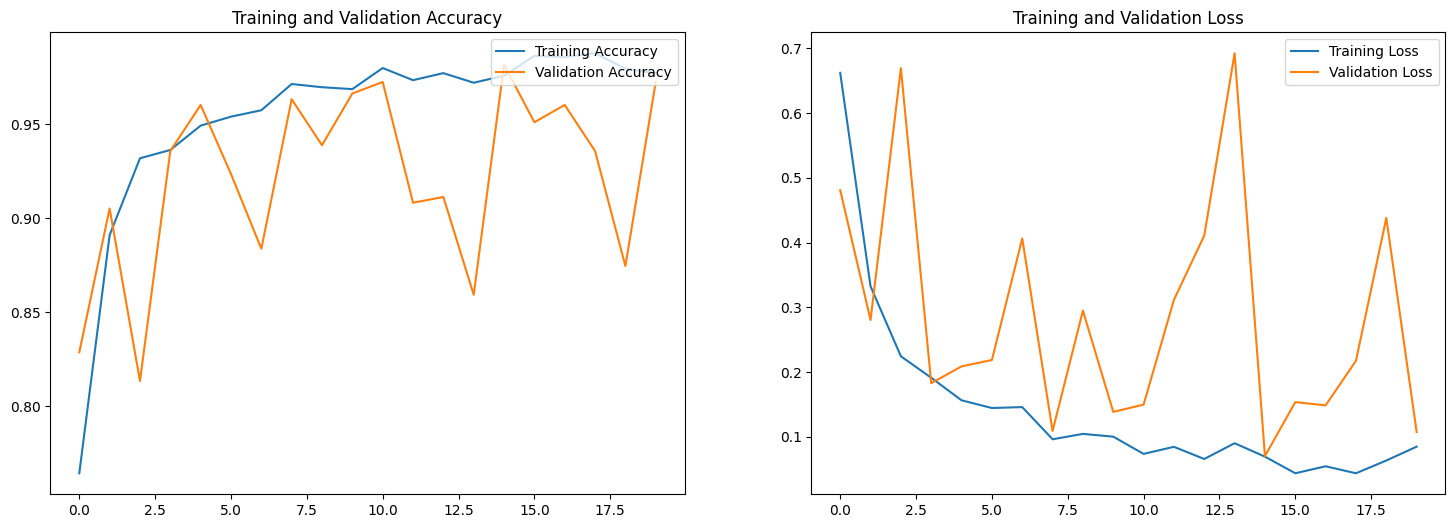

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(history.history['accuracy']))

plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.plot(range(len(history.history['accuracy'])), acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [11]:
loss, accuracy = model.evaluate(X_test,y_test)

11/11 [==============================] - 0s 26ms/step - loss: 0.1074 - accuracy: 0.9725


In [12]:
model.optimizer.get_config()  

{'name': 'Adam',
 'weight_decay': None,
 'clipnorm': None,
 'global_clipnorm': None,
 'clipvalue': None,
 'use_ema': False,
 'ema_momentum': 0.99,
 'ema_overwrite_frequency': None,
 'jit_compile': True,
 'is_legacy_optimizer': False,
 'learning_rate': 0.001,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

In [16]:
predicted_labels = model.predict(X_test)
predicted_labels = [np.argmax(i) for i in predicted_labels]
original_labels =[np.argmax(i) for i in y_test]

11/11 [==============================] - 0s 23ms/step


In [17]:
conf_mat = confusion_matrix(original_labels, predicted_labels)
report = classification_report(original_labels, predicted_labels)
print(conf_mat)
print(report)

[[46  0  0  2]
 [ 0 99  1  0]
 [ 0  4 88  1]
 [ 0  1  0 85]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        48
           1       0.95      0.99      0.97       100
           2       0.99      0.95      0.97        93
           3       0.97      0.99      0.98        86

    accuracy                           0.97       327
   macro avg       0.98      0.97      0.97       327
weighted avg       0.97      0.97      0.97       327



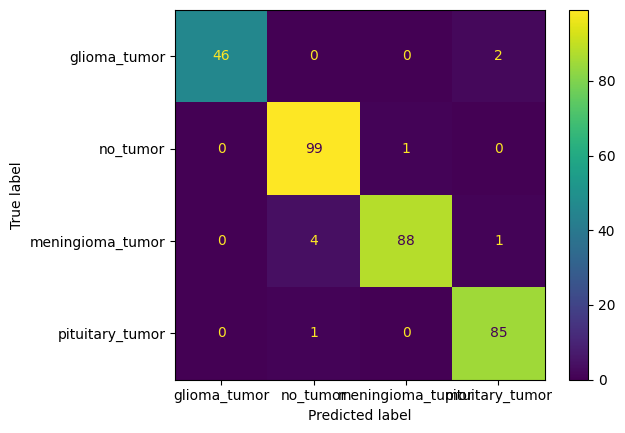

In [21]:
cm = confusion_matrix(original_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
disp.plot()
plt.show()

In [22]:
model.save('tumor_classifier.h5')
print("Saved model", model)

Saved model <keras.engine.sequential.Sequential object at 0x7fef25659360>
